# SLO Twitter Data Analysis - Stock Symbols, URL's, and Emoji's

Setup Jupyter Notebook kernel for SLO data analysis.<br>

In [10]:
import logging as log
import warnings
import time
import re
import emoji
import numpy as np
from matplotlib import pyplot as plt
import pandas as pd
import seaborn as sns

# Import custom utility functions.
import slo_twitter_data_analysis_utility_functions_v2 as tweet_util_v2

#############################################################
# Adjust parameters to display all contents.
pd.options.display.max_rows = None
pd.options.display.max_columns = None
pd.options.display.width = None
pd.options.display.max_colwidth = 1000
# Seaborn setting.
sns.set()
# Set level of precision for float value output.
pd.set_option('precision', 12)
# Ignore these types of warnings - don't output to console.
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.simplefilter(action='ignore', category=DeprecationWarning)
warnings.simplefilter(action='ignore', category=UserWarning)
# Matplotlib log settings.
mylog = log.getLogger("matplotlib")
mylog.setLevel(log.INFO)

"""
Turn debug log statements for various sections of code on/off.
(adjust log level as necessary)
"""
log.basicConfig(level=log.INFO)


# Import CSV dataset and convert to dataframe.
tweet_dataframe = tweet_util_v2.import_dataset(
    "D:/Dropbox/summer-research-2019/jupyter-notebooks/attribute-datasets/"
    "twitter-dataset-6-22-19-fixed.csv",
    "csv", False)

d:\dropbox\cs344-ai\venv3.6-64bit\lib\site-packages\IPython\core\interactiveshell.py:3209: DtypeWarning: Columns (36,48) have mixed types. Specify dtype option on import or set low_memory=False.
  if (yield from self.run_code(code, result)):


# SLO Twitter Data Analysis  - Stock Symbols

<span style="font-family:Papyrus; font-size:1.25em;">

The section below provides statistics on stock symbols within the Tweet text.<br>

</span>

For each company, the # of stock symbols across all associated Tweets


<Figure size 432x288 with 0 Axes>

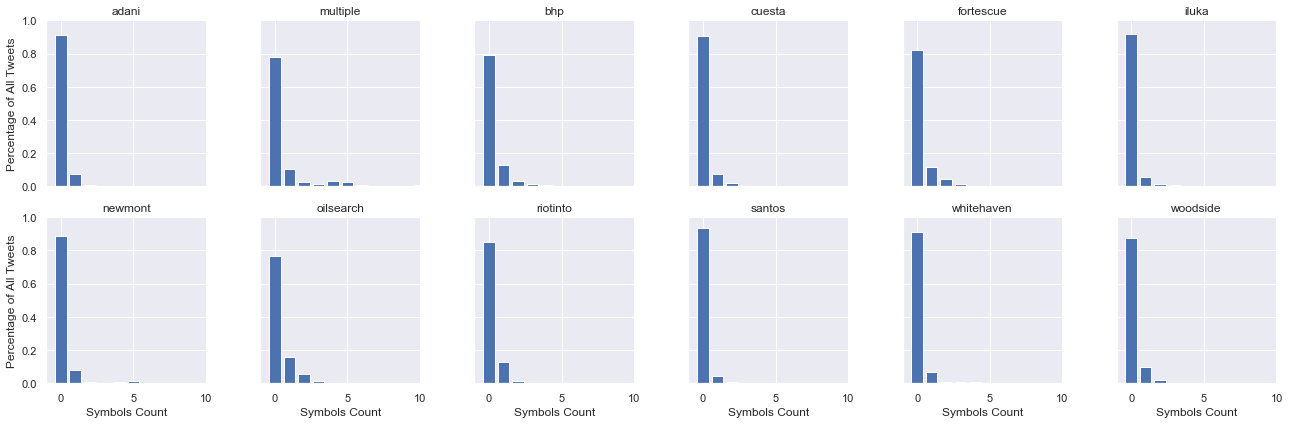

In [4]:
    # Find all stock symbols and count the number of them.
    tweet_dataframe['#symbols'] = tweet_dataframe.text_derived.str.findall(r"\$\w+").apply(len)

    # Graph stock symbol count distribution by company.
    plt.figure()
    print(f"For each company, the # of stock symbols across all associated Tweets")
    grid = sns.FacetGrid(tweet_dataframe[['#symbols', 'company_derived_designation']],
                         col='company_derived_designation', col_wrap=6, ylim=(0, 1), xlim=(-1, 10))
    grid.map_dataframe(tweet_util_v2.bar_plot, '#symbols')
    grid.set_titles('{col_name}')
    grid.set_xlabels("Symbols Count").set_ylabels("Percentage of All Tweets")
    plt.show()

<span style="font-family:Papyrus; font-size:1.25em;">

Most of the Tweets for each company do not have any stock symbols.  Those that do, generally possess just one of them.<br>

</span>

## Subtitle Placeholder:

In [3]:
    print(f"The percentage of all Tweets in the dataset that possess stock symbols:")
    (tweet_dataframe['#symbols'] > 0).sum() / len(tweet_dataframe)

The percentage of all Tweets in the dataset that possess stock symbols:


0.103097135254301

<span style="font-family:Papyrus; font-size:1.25em;">

Only a tenth of our dataset has Tweets with stock symbols.<br>

</span>

# SLO Twitter Data Analysis  - URL's

<span style="font-family:Papyrus; font-size:1.25em;">

The section below provides statistics on URL's within the Tweet text.<br>

</span>

For each company, the # of URL's across all associated Tweets


<Figure size 432x288 with 0 Axes>

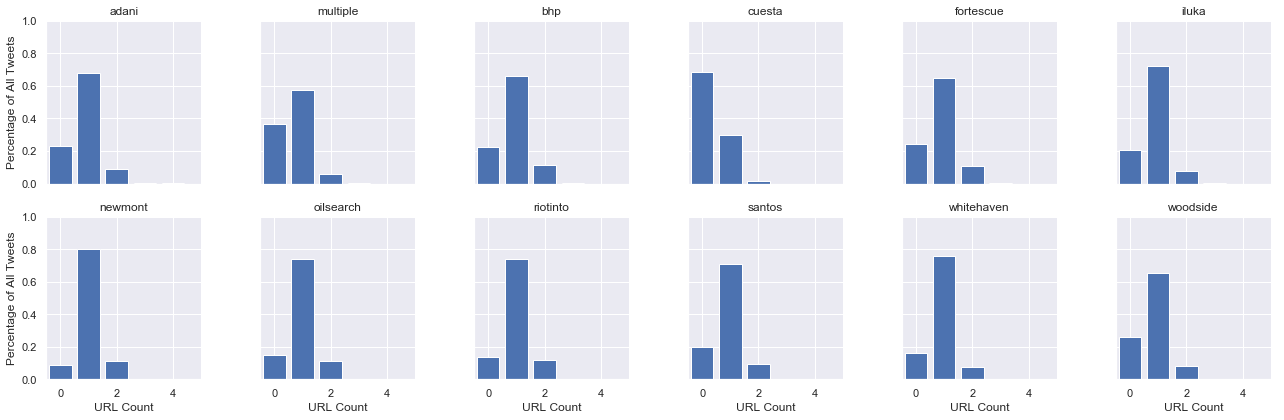

In [7]:
    # Find all URL's and count the # of them.
    ptn_url = re.compile(r"http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+")
    tweet_dataframe['#urls'] = tweet_dataframe.text_derived.str.findall(ptn_url).apply(len)

    # Graph URL count distribution by company.
    plt.figure()
    print(f"For each company, the # of URL's across all associated Tweets")
    grid = sns.FacetGrid(tweet_dataframe[['#urls', 'company_derived_designation']], col='company_derived_designation',
                         col_wrap=6, ylim=(0, 1), xlim=(-0.5, 5))
    grid.map_dataframe(tweet_util_v2.bar_plot, '#urls')
    grid.set_titles('{col_name}')
    grid.set_xlabels("URL Count").set_ylabels("Percentage of All Tweets")
    plt.show()

<span style="font-family:Papyrus; font-size:1.25em;">

The majority of Tweets for each company have at least 1 URL within their text.<br>

</span>

## Subtitle Placeholder:

In [8]:
    print(f"The percentage of all Tweets in the dataset that possess URL's:")
    (tweet_dataframe['#urls'] > 0).sum() / len(tweet_dataframe)

The percentage of all Tweets in the dataset that possess URL's:


0.7754144379842071

<span style="font-family:Papyrus; font-size:1.25em;">

Over 3/4th of our dataset possess Tweets that contain URLs.<br>

</span>

# SLO Twitter Data Analysis  - Emoji's

<span style="font-family:Papyrus; font-size:1.25em;">

The section below provides statistics on Emoji's within the Tweet text.<br>

</span>

In [11]:
    # Identify if any Tweets within out dataset have emojis.
    ptn_emoji = emoji.get_emoji_regexp()
    print(tweet_dataframe.text_derived.str.contains(ptn_emoji).any())

True


<span style="font-family:Papyrus; font-size:1.25em;">

We do have Tweet text within our dataset that contain emojis.<br>

Note: It takes some minutes to execute this search on our current 1.6 GBS CSV dataset file.<br>

</span>

## Subtitle Placeholder:

In [12]:
    # Create column containing extracted emoji's.
    tweet_dataframe['emojis'] = tweet_dataframe.text_derived.str.extractall(ptn_emoji).groupby(level=0).apply(
        lambda x: x.values.flatten())

    # Count the percentage of Tweets with emojis in the dataset.
    print(tweet_dataframe['emojis'].notnull().sum() / len(tweet_dataframe))

0.003420213416544108


<span style="font-family:Papyrus; font-size:1.25em;">

Apparently not too many Tweets contain text with emojis in our dataset.<br>

</span>

## Subtitle Placeholder:

In [14]:
    # Create column containing the # of emoji's for each Tweet's text.
    tweet_dataframe['#emojis'] = tweet_dataframe['emojis'].apply(lambda x: len(x) if x is not np.nan else 0)

    # Group by company the # of emoji's found for their associated Tweets.
    print(tweet_dataframe[['company_derived_designation', '#emojis']].groupby('company_derived_designation').apply(
        lambda x: 1 - x['#emojis'].value_counts(normalize=True).loc[0]))

company_derived_designation
adani         0.001895494894
bhp           0.002331111008
cuesta        0.182847896440
fortescue     0.000934420659
iluka         0.004541031463
multiple      0.001208021261
newmont       0.000000000000
oilsearch     0.000642673522
riotinto      0.004588415232
santos        0.010738196679
whitehaven    0.002711312953
woodside      0.001223280968
dtype: float64


<span style="font-family:Papyrus; font-size:1.25em;">

The percentage of Tweets associated with each company that contain emojis.  It appears a statistically significant portion of "cuesta" Tweets contain emojis whereas no Tweets for "newmont" contain emojis.<br>

</span>

## Subtitle Placeholder:

For each company, the # of emoji's across all associated Tweets


<Figure size 432x288 with 0 Axes>

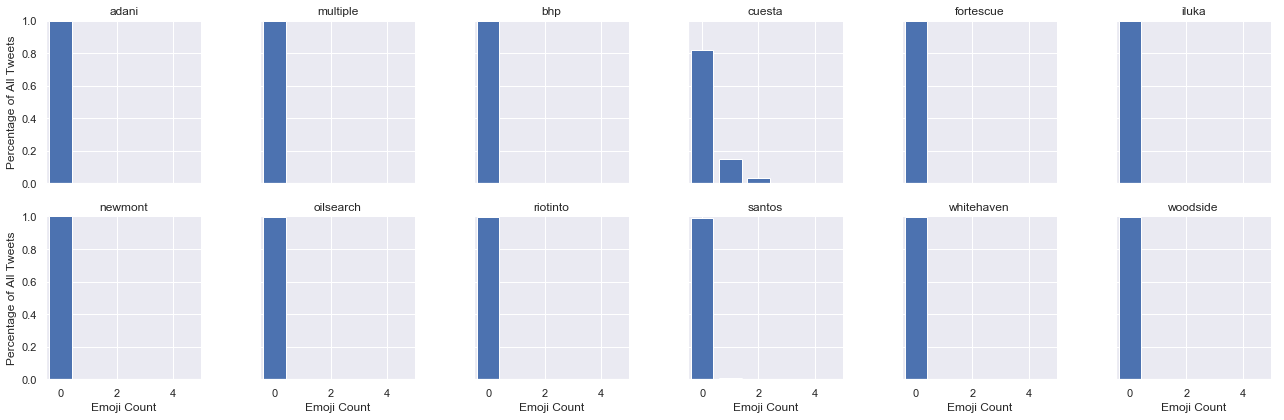

In [15]:
    # Graph the emoji distribution.
    print(f"For each company, the # of emoji's across all associated Tweets")
    plt.figure()
    grid = sns.FacetGrid(tweet_dataframe[['#emojis', 'company_derived_designation']],
                         col='company_derived_designation', col_wrap=6, ylim=(0, 1), xlim=(-0.5, 5))
    grid.map_dataframe(tweet_util_v2.bar_plot, '#emojis')
    grid.set_titles('{col_name}')
    grid.set_xlabels("Emoji Count").set_ylabels("Percentage of All Tweets")
    plt.show()

<span style="font-family:Papyrus; font-size:1.25em;">

Most Tweets for any given company do not contain emojis.  We would have to adjust the scaling of our y-axis labels to see the small percentage of Tweets for every company besides "cuesta" that do posssess emojis.<br>

</span>

## Subtitle Placeholder:

In [22]:
    print(tweet_dataframe[['company_derived_designation', 'emojis']][tweet_dataframe['emojis'].notnull()].groupby(
        'company_derived_designation') \
          .apply(lambda x: pd.Series([_emoji for emojis in x['emojis'] for _emoji in emojis])
                 .value_counts(normalize=True).head()))

company_derived_designation   
adani                        ©    0.844793713163
                             ®    0.155206286837
bhp                          ©    0.764267990074
                             ®    0.235732009926
cuesta                       ©    1.000000000000
fortescue                    ©    0.777777777778
                             ®    0.222222222222
iluka                        ©    0.511111111111
                             ®    0.488888888889
multiple                     ©    1.000000000000
oilsearch                    ©    1.000000000000
riotinto                     ©    0.847222222222
                             ®    0.152777777778
santos                       ©    0.835000000000
                             ®    0.165000000000
whitehaven                   ©    0.808510638298
                             ®    0.191489361702
woodside                     ©    0.826086956522
                             ®    0.173913043478
dtype: float64


<span style="font-family:Papyrus; font-size:1.25em;">

The type visual type of emoji that each company's Tweets possesses and what percentage of all their associated Tweets contain that particular emoji.<br>

Note: This is not an exhaustive list.<br>

</span>